In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
train_data = pd.read_csv('../input/playground-series-s4e10/train.csv')
test_data = pd.read_csv('../input/playground-series-s4e10/test.csv')

# Display the first few rows
train_data.sample(5)



,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
10753,10753,24,72000,RENT,8.0,PERSONAL,A,7000,7.90,0.10,N,4,0
17325,17325,25,45000,RENT,2.0,EDUCATION,B,8000,10.59,0.18,N,4,0
51240,51240,34,89004,RENT,1.0,VENTURE,A,10000,7.51,0.11,N,9,0
47999,47999,31,34000,RENT,4.0,PERSONAL,A,2400,7.66,0.07,N,9,1
21858,21858,24,34000,RENT,8.0,DEBTCONSOLIDATION,D,10000,15.31,0.29,N,4,1


In [3]:
#sns.pairplot(train_data)

In [4]:
train_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

<Axes: xlabel='person_home_ownership', ylabel='loan_status'>

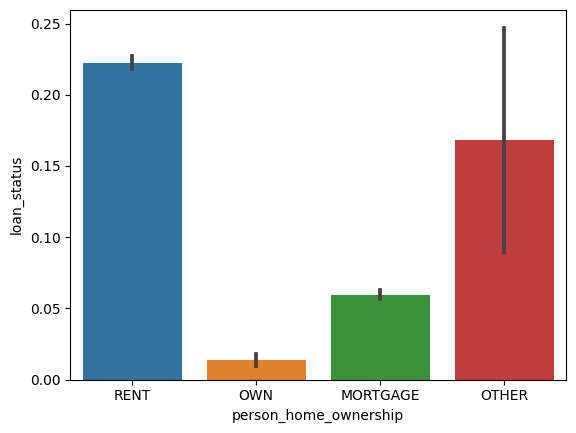

In [6]:
sns.barplot(x=train_data['person_home_ownership'],y=train_data['loan_status'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='person_age', ylabel='loan_status'>

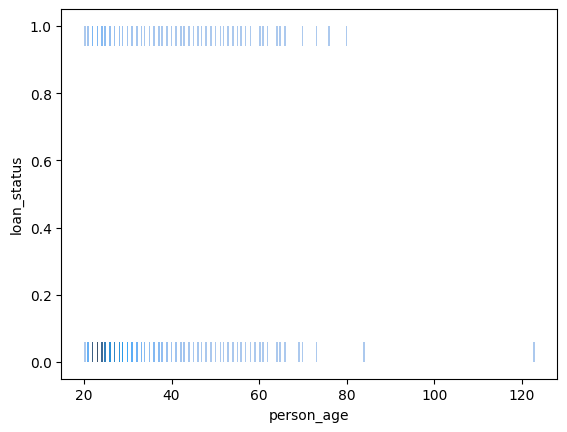

In [7]:
sns.histplot(x=train_data['person_age'],y=train_data['loan_status'],kde=True)

<Axes: xlabel='loan_grade', ylabel='person_age'>

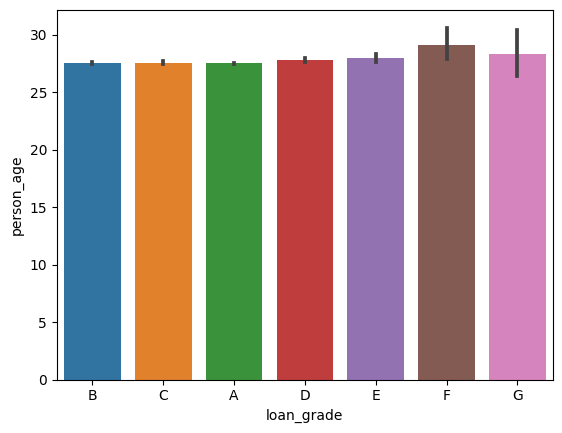

In [8]:
sns.barplot(x=train_data['loan_grade'],y=train_data['person_age'])

Its getting difficult to visualise the data lest normalise it and see if it helps 


In [9]:
train_data['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [10]:
'''#onehotencoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

transformer=ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=['A','B','C','D','E','F','G']),['loan_grade']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['person_home_ownership'],['loan_intent'],['cb_person_default_on_file'])
],remainder='passthrough')'''

"#onehotencoding\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OrdinalEncoder, OneHotEncoder\n\ntransformer=ColumnTransformer(transformers=[\n    ('tnf1',OrdinalEncoder(categories=['A','B','C','D','E','F','G']),['loan_grade']),\n    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['person_home_ownership'],['loan_intent'],['cb_person_default_on_file'])\n],remainder='passthrough')"

In [11]:
'''# Define feature columns (excluding 'loan_status')
feature_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade', 
                   'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 
                   'loan_percent_income', 'cb_person_cred_hist_length']

# Define the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('loan_grade_encoder', OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']]), ['loan_grade']),
        ('categorical_encoder', OneHotEncoder(sparse_output=False, drop='first'), 
         ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'])
    ],
    remainder='passthrough'  # Keeps the other numerical columns in their original form
)

# Step 1: Separate the target variable from the train_data
X_train = train_data.drop(columns=['loan_status'])  # Features only
y_train = train_data['loan_status']  # Target column

# Step 2: Fit the transformer on the training data
X_train_transformed = transformer.fit_transform(X_train)

# Step 3: Transform the test data using the fitted transformer
X_test_transformed = transformer.transform(test_data)

# Step 4: Optionally, you can reattach the 'loan_status' column to the transformed train data
# Here we convert transformed arrays back into DataFrames if you need them in DataFrame form
import pandas as pd

# Since the transformed data is a NumPy array, convert it back to DataFrame if you need that format
X_train_transformed_df = pd.DataFrame(X_train_transformed)

# Concatenate transformed features with the target column
train_data_transformed = pd.concat([X_train_transformed_df, y_train.reset_index(drop=True)], axis=1)

'''

"# Define feature columns (excluding 'loan_status')\nfeature_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade', \n                   'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', \n                   'loan_percent_income', 'cb_person_cred_hist_length']\n\n# Define the ColumnTransformer\ntransformer = ColumnTransformer(\n    transformers=[\n        ('loan_grade_encoder', OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']]), ['loan_grade']),\n        ('categorical_encoder', OneHotEncoder(sparse_output=False, drop='first'), \n         ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'])\n    ],\n    remainder='passthrough'  # Keeps the other numerical columns in their original form\n)\n\n# Step 1: Separate the target variable from the train_data\nX_train = train_data.drop(columns=['loan_status'])  # Features only\ny_train = train_data['loan_status']  # Target column\n\n# Step 2: Fi

In [12]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define the numerical columns that need scaling (excluding 'id' and 'loan_status')
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 
                     'loan_percent_income', 'cb_person_cred_hist_length']

# We no longer need to re-encode the categorical features; we only scale the numerical ones
transformer = ColumnTransformer(
    transformers=[
        ('numerical_scaler', StandardScaler(), numerical_columns)  # Scaling numerical columns only
    ],
    remainder='passthrough'  # Keeps everything else unchanged (including the encoded categorical features)
)

# Step 1: Separate the target variable from the train_data
X_train = train_data.drop(columns=['loan_status'])  # Features only
y_train = train_data['loan_status']  # Target column

# Step 2: Fit the transformer on the training data (scale only the numerical columns)
X_train_scaled = transformer.fit_transform(X_train)

# Step 3: Transform the test data using the fitted transformer (scale the test set as well)
X_test_scaled = transformer.transform(test_data)

# Step 4: Optionally, you can reattach the 'loan_status' column to the transformed train data
import pandas as pd

# Since the transformed data is a NumPy array, convert it back to DataFrame if needed
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Concatenate transformed features with the target column
train_data_scaled = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
'''

"from sklearn.preprocessing import StandardScaler\nfrom sklearn.compose import ColumnTransformer\n\n# Define the numerical columns that need scaling (excluding 'id' and 'loan_status')\nnumerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', \n                     'loan_percent_income', 'cb_person_cred_hist_length']\n\n# We no longer need to re-encode the categorical features; we only scale the numerical ones\ntransformer = ColumnTransformer(\n    transformers=[\n        ('numerical_scaler', StandardScaler(), numerical_columns)  # Scaling numerical columns only\n    ],\n    remainder='passthrough'  # Keeps everything else unchanged (including the encoded categorical features)\n)\n\n# Step 1: Separate the target variable from the train_data\nX_train = train_data.drop(columns=['loan_status'])  # Features only\ny_train = train_data['loan_status']  # Target column\n\n# Step 2: Fit the transformer on the training data (scale only the numerical c

In [13]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score
import joblib  # For saving and loading models
import numpy as np

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Step 1: Load the train and test datasets
train_data = train_data  # Make sure to use the correct path
test_data = test_data

# Step 2: Define feature columns (excluding 'loan_status' and 'id')
feature_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade', 
                   'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 
                   'loan_percent_income', 'cb_person_cred_hist_length']

# Define the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('loan_grade_encoder', OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']]), ['loan_grade']),
        ('categorical_encoder', OneHotEncoder(sparse_output=False, drop='first'), 
         ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']),
        ('numerical_scaler', StandardScaler(), 
         ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
    ],
    remainder='passthrough'  # Keeps 'id' unchanged (passthrough)
)

# Step 3: Separate the target variable from the train_data
X_train = train_data.drop(columns=['loan_status', 'id'])  # Exclude target and id
y_train = train_data['loan_status']  # Target column

# Step 4: Fit the transformer on the training data
X_train_transformed = transformer.fit_transform(X_train)

# Step 5: Transform the test data using the fitted transformer
X_test_transformed = transformer.transform(test_data.drop(columns=['id']))

# Step 6: Train and save multiple models

# List of models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='auc', use_label_encoder=False, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=500, random_state=42)
}

# Train and evaluate each model, then save it
for name, model in models.items():
    print(f'Training {name}...')
    
    # Train the model on the transformed training data
    model.fit(X_train_transformed, y_train)
    
    # Predict on training data to calculate AUC (since we are not using a validation set here)
    train_probs = model.predict_proba(X_train_transformed)[:, 1]  # Probability estimates for the positive class
    auc = roc_auc_score(y_train, train_probs)
    print(f'{name} Training AUC: {auc}')
    
    # Save the trained model using joblib
    model_filename = f'{name.replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_filename)
    print(f'{name} saved as {model_filename}\n')

# Models are saved; tomorrow, you can reload them and focus on hyperparameter tuning or predictions


Training Logistic Regression...
Logistic Regression Training AUC: 0.8935794143892353
Logistic Regression saved as Logistic_Regression_model.pkl

Training Random Forest...
Random Forest Training AUC: 1.0
Random Forest saved as Random_Forest_model.pkl

Training XGBoost...
XGBoost Training AUC: 0.9857307276291437
XGBoost saved as XGBoost_model.pkl

Training Support Vector Machine...
Support Vector Machine Training AUC: 0.8971410260302539
Support Vector Machine saved as Support_Vector_Machine_model.pkl

Training Neural Network...
Neural Network Training AUC: 0.9453865975177591
Neural Network saved as Neural_Network_model.pkl



In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create base XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train_transformed, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation AUC:", grid_search.best_score_)

# Train final model with best parameters
best_xgb = XGBClassifier(
    **grid_search.best_params_,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)
best_xgb.fit(X_train_transformed, y_train)

# Save the tuned model
joblib.dump(best_xgb, 'XGBoost_tuned_model.pkl')

# Get feature importance
feature_importance = best_xgb.feature_importances_

# Get feature names from the transformer
feature_names = []

# Add ordinal encoded feature names
feature_names.extend(['loan_grade'])

# Add one-hot encoded feature names
categorical_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
categorical_feature_names = []
for i, transformer in enumerate(transformer.named_transformers_['categorical_encoder'].get_feature_names_out(categorical_features)):
    categorical_feature_names.append(transformer)
feature_names.extend(categorical_feature_names)

# Add numerical feature names
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
feature_names.extend(numerical_features)

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_

In [15]:
# Load the best model
best_model = joblib.load('XGBoost_tuned_model.pkl')

# Generate predictions for the test set using the transformed test data
test_probs = best_model.predict_proba(X_test_transformed)[:, 1]

# Prepare submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'loan_status': test_probs
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print('Submission file saved as submission.csv')

Submission file saved as submission.csv


In [16]:
# Once we have our tuned model, load it (if you're running this later)
best_model = joblib.load('XGBoost_tuned_model.pkl')

# Generate predictions for the test set using the transformed test data
test_probs = best_model.predict_proba(X_test_transformed)[:, 1]

# Prepare submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'loan_status': test_probs
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print('Submission file saved as submission.csv')


Submission file saved as submission.csv
